In [2]:
import pandas as pd

#Read each tab into separate DataFrames
df1 = pd.read_excel('Project_Data.xlsx', sheet_name='Demo', dtype={'Other ID': str})
df2 = pd.read_excel('Project_Data.xlsx', sheet_name='Eco Disadvantage and Income', dtype={'Other ID': str})
df3 = pd.read_excel('Project_Data.xlsx', sheet_name='Credits and Term', dtype={'Other ID': str})
df4 = pd.read_excel('Project_Data.xlsx', sheet_name='Graduates', dtype={'Other ID': str})
df5 = pd.read_excel('Project_Data.xlsx', sheet_name='Withdrawal Dates', dtype={'Other ID': str})


# Ensure 'Other ID' column is treated as string to preserve leading zeros
for df in [df1, df2, df3, df4, df5]:
    df['Other ID'] = df['Other ID'].astype(str)
    
# Merge the DataFrames based on the 'Other ID' column
combined_df = df1.merge(df2, on='Other ID', how='outer')
combined_df = combined_df.merge(df3, on='Other ID', how='outer')
combined_df = combined_df.merge(df4, on='Other ID', how='outer')
combined_df = combined_df.merge(df5, on='Other ID', how='outer')

# Export the combined DataFrame to a new Excel file
#combined_df.to_excel('combined_data.xlsx', index=False)


# Display or export the combined DataFrame
print(combined_df.head(5))

   Ent_x Cal Code_x Other ID    Status  Age Sex Local Race His/Lat Ethnicity  \
0      2          2        1  Inactive   26   F   HISPANIC                 Y   
1      2          2        1  Inactive   26   F   HISPANIC                 Y   
2      2          2        1  Inactive   26   F   HISPANIC                 Y   
3      2          2        1  Inactive   26   F   HISPANIC                 Y   
4      2          2        1  Inactive   26   F   HISPANIC                 Y   

  Grad Date_x        DOB  ... Cat     Description Grade Ent Cal Code_y  \
0         NaT 1997-08-25  ...   R     Algebra I A    12 NaN        NaN   
1         NaT 1997-08-25  ...   R       Economics    12 NaN        NaN   
2         NaT 1997-08-25  ...   R     English I A    12 NaN        NaN   
3         NaT 1997-08-25  ...   R      English IV    12 NaN        NaN   
4         NaT 1997-08-25  ...   R  Fnd of English    12 NaN        NaN   

   Grad Date_y Withdrawal Date_x  Withdrw Withdrawal Date_y  \
0          

In [3]:
#Rename headings
combined_df.rename(columns={'Ent_x': 'School',
                            'Cal Code_x': 'Student Type',
                            'Schl Yr': 'School Year',
                            'Other ID': 'ID',
                            'DOB': 'Date of Birth',
                           'Student Language Description': 'Student Language',
                            'Withdrawal Date_x': 'Graduate Withdrawal Date',
                            'Withdrw': 'Graduated',
                            'Withdrawal Comment' : 'Drop Out Withdraw Reason',
                            'Ent': 'Graduate Campus',
                            'Cal Code_y': 'Graduate Student Type',
                            'Grad Date_y': 'Graduate Date',
                            'Withdrawal Date_y': 'Drop Out Date',
                            'Drop Out Withdraw Date': 'Graduate Status',
                            'Entity': 'Credit Earned Campus'
                           }, inplace=True)


# Display the updated DataFrame
print(combined_df.columns)

Index(['School', 'Student Type', 'ID', 'Status', 'Age', 'Sex', 'Local Race',
       'His/Lat Ethnicity', 'Grad Date_x', 'Date of Birth', 'Birth Country',
       'Student Language', 'Home Language Description', 'Marital Status',
       'Fed Race Description', 'Ent_y', 'Economic Disadvantage', 'Econ Dis',
       'Food Stamps/TANF', 'Household Size', 'Qualifies as Eco Dis',
       'Total Income', 'Credit Earned Campus', 'School Year', 'Term Ltrl',
       'Sub', 'Class', 'Class Status', 'Earned Cred', 'Cat', 'Description',
       'Grade', 'Graduate Campus', 'Graduate Student Type', 'Graduate Date',
       'Graduate Withdrawal Date', 'Graduated', 'Drop Out Date',
       'Drop Out Withdraw Reason'],
      dtype='object')


In [4]:
# Define a dictionary to map values in school to their corresponding labels
mapping = {
        1: 'Norwood',
        2: 'Coleman',
        3: 'South Austin',
        4: 'Billy Moore',
        5: 'Bradshaw',
        6: 'AYW',
        7: 'Diboll',
        8: 'Connally',
        800: 'Alumni',
       }
#replace several columns with campus names to make data labels easier to understand
# Replace values from entity to school using the mapping dictionary
combined_df['School'] = combined_df['School'].replace(mapping)

# Replace values from entity to grad campus the mapping dictionary
combined_df['Graduate Campus'] = combined_df['Graduate Campus'].replace(mapping)

# Replace values from entity to credit earned using the mapping dictionary
combined_df['Credit Earned Campus'] = combined_df['Credit Earned Campus'].replace(mapping)
                                                     
# Display the updated DataFrame
print(combined_df.head(5))

    School Student Type ID    Status  Age Sex Local Race His/Lat Ethnicity  \
0  Coleman            2  1  Inactive   26   F   HISPANIC                 Y   
1  Coleman            2  1  Inactive   26   F   HISPANIC                 Y   
2  Coleman            2  1  Inactive   26   F   HISPANIC                 Y   
3  Coleman            2  1  Inactive   26   F   HISPANIC                 Y   
4  Coleman            2  1  Inactive   26   F   HISPANIC                 Y   

  Grad Date_x Date of Birth  ... Cat     Description Grade Graduate Campus  \
0         NaT    1997-08-25  ...   R     Algebra I A    12             NaN   
1         NaT    1997-08-25  ...   R       Economics    12             NaN   
2         NaT    1997-08-25  ...   R     English I A    12             NaN   
3         NaT    1997-08-25  ...   R      English IV    12             NaN   
4         NaT    1997-08-25  ...   R  Fnd of English    12             NaN   

  Graduate Student Type  Graduate Date Graduate Withdrawal Dat

In [5]:
# Define a dictionary to map values in school to their corresponding labels
mapping = {
        1: 'Day Student',
        2: 'Day Student',
        3: 'Night Student',
        4: 'Day Student',
        5: 'Day Student',
        6: 'Day Student',
        7: 'Day Student',
        8: 'Day Student',
        '001': 'Day Student',
        '002': 'Day Student',
        '003': 'Night Student',
        '004': 'Day Student',
        '005': 'Day Student',
        '006': 'Day Student',
        '007': 'Day Student',
        '008': 'Day Student',
        '107': 'Day Student',
        '126': 'Day Student',
        800: 'Graduate',
        '800': 'Graduate',
        'I01': 'Online Student',
        'I26': 'Online Student',
        'N01': 'Night Student',
        'N03': 'Night Student',
        'N26': 'Night Student',
        'O26': 'Day Student'
       }

#replace values to make data labels easier to read
# Replace values in student type column using the mapping dictionary
combined_df['Student Type'] = combined_df['Student Type'].replace(mapping)

# Replace values in graduate student type using the mapping dictionary
combined_df['Graduate Student Type'] = combined_df['Graduate Student Type'].replace(mapping)

# Display the updated DataFrame
print(combined_df.head(5))

    School Student Type ID    Status  Age Sex Local Race His/Lat Ethnicity  \
0  Coleman  Day Student  1  Inactive   26   F   HISPANIC                 Y   
1  Coleman  Day Student  1  Inactive   26   F   HISPANIC                 Y   
2  Coleman  Day Student  1  Inactive   26   F   HISPANIC                 Y   
3  Coleman  Day Student  1  Inactive   26   F   HISPANIC                 Y   
4  Coleman  Day Student  1  Inactive   26   F   HISPANIC                 Y   

  Grad Date_x Date of Birth  ... Cat     Description Grade Graduate Campus  \
0         NaT    1997-08-25  ...   R     Algebra I A    12             NaN   
1         NaT    1997-08-25  ...   R       Economics    12             NaN   
2         NaT    1997-08-25  ...   R     English I A    12             NaN   
3         NaT    1997-08-25  ...   R      English IV    12             NaN   
4         NaT    1997-08-25  ...   R  Fnd of English    12             NaN   

  Graduate Student Type  Graduate Date Graduate Withdrawal Dat

In [6]:
# recode values in graduated column, 1 to graduate for analysis
mapping = {
        "1.0": 'Graduate',
        'nan': 'Dropped Out',
       }

# Convert the 'Graduate Status' column to string type
combined_df['Graduated'] = combined_df['Graduated'].astype(str)

# Replace values in column A using the mapping dictionary
combined_df['Graduated'] = combined_df['Graduated'].replace(mapping)

                                                     
# Display the updated DataFrame
print(combined_df.head(5))

    School Student Type ID    Status  Age Sex Local Race His/Lat Ethnicity  \
0  Coleman  Day Student  1  Inactive   26   F   HISPANIC                 Y   
1  Coleman  Day Student  1  Inactive   26   F   HISPANIC                 Y   
2  Coleman  Day Student  1  Inactive   26   F   HISPANIC                 Y   
3  Coleman  Day Student  1  Inactive   26   F   HISPANIC                 Y   
4  Coleman  Day Student  1  Inactive   26   F   HISPANIC                 Y   

  Grad Date_x Date of Birth  ... Cat     Description Grade Graduate Campus  \
0         NaT    1997-08-25  ...   R     Algebra I A    12             NaN   
1         NaT    1997-08-25  ...   R       Economics    12             NaN   
2         NaT    1997-08-25  ...   R     English I A    12             NaN   
3         NaT    1997-08-25  ...   R      English IV    12             NaN   
4         NaT    1997-08-25  ...   R  Fnd of English    12             NaN   

  Graduate Student Type  Graduate Date Graduate Withdrawal Dat

In [7]:
import pandas as pd
from datetime import datetime

# Set display width to a high value
pd.set_option('display.width', 5000) 

# Define school year ranges from August 1 through July 31 for each year
school_years = [(datetime(year, 8, 1), datetime(year + 1, 7, 31)) for year in range(2014, 2024)]

# Create empty dictionaries to store the total number of unique students who graduated and dropped out for each school year
graduates_by_year = {}
dropped_out_by_year = {}

# Filter combined_df to include only rows where the Graduate Status is 'Graduated' or 'Dropped Out'
graduate_students = combined_df[combined_df['Graduated'] == 'Graduate']
dropped_out_students = combined_df[combined_df['Graduated'] == 'Dropped Out']

# Group by school year and count the number of unique students who graduated and dropped out for each school year
for start_date, end_date in school_years:
    year_range = f"{start_date.year}-{end_date.year}"
    
    # Graduates
    graduates_by_year[year_range] = graduate_students[
        (graduate_students['Graduate Date'] >= start_date) &
        (graduate_students['Graduate Date'] <= end_date)
    ]['ID'].nunique()
    
    # Dropped Out
    dropped_out_by_year[year_range] = dropped_out_students[
        (dropped_out_students['Drop Out Date'] >= start_date) &
        (dropped_out_students['Drop Out Date'] <= end_date)
    ]['ID'].nunique()

# Convert the dictionaries into DataFrames for easier plotting
graduates_df = pd.DataFrame(list(graduates_by_year.items()), columns=['School Year', 'Total Graduates'])
dropped_out_df = pd.DataFrame(list(dropped_out_by_year.items()), columns=['School Year', 'Total Dropouts'])

# Merge the DataFrames on 'School Year'
merged_df = pd.merge(graduates_df, dropped_out_df, on='School Year', how='outer')

# Create an empty list to store results for students without graduation
results_without_graduation = []

# Loop through each school year range
for start_date, end_date in school_years:
    # Filter the DataFrame to include only students without a graduation date within the school year range
    students_in_year = combined_df[(combined_df['Graduate Date'].isnull()) & 
                                    (combined_df['Drop Out Date'] >= start_date) & 
                                    (combined_df['Drop Out Date'] <= end_date)].copy()
    
    # Calculate the age of each student at the time of withdrawal within the school year range
    students_in_year['Age at Withdrawal'] = (students_in_year['Drop Out Date'] - students_in_year['Date of Birth']).dt.days // 365
    
    # Compute the average age of students without a graduation date for the school year
    average_age = students_in_year['Age at Withdrawal'].mean()
    
    # Append the result to the list
    results_without_graduation.append({'School Year': f"{start_date.year}-{end_date.year}", 
                                       'Average Age (Non-Graduates)': round(average_age, 2)})

# Create a DataFrame from the list of results for students without graduation
average_age_per_year_without_graduation = pd.DataFrame(results_without_graduation)

# Create an empty list to store results for graduates
results_graduates = []

# Loop through each school year range
for start_date, end_date in school_years:
    # Filter the DataFrame to include only graduates within the school year range
    graduates_in_year = combined_df[(combined_df['Graduate Date'] >= start_date) & 
                                     (combined_df['Graduate Date'] <= end_date)].copy()
    
    # Calculate the age of each graduate at the time of graduation within the school year range
    graduates_in_year['Age at Graduation'] = (graduates_in_year['Graduate Date'] - graduates_in_year['Date of Birth']).dt.days // 365
    
    # Compute the overall average age for the school year by taking the mean of mean ages per ID
    overall_average_age = graduates_in_year['Age at Graduation'].mean()
    
    # Append the result to the list
    results_graduates.append({'School Year': f"{start_date.year}-{end_date.year}", 'Average Age (Graduates)': round(overall_average_age, 2)})

# Create a DataFrame from the list of results for graduates
average_age_per_year_graduates = pd.DataFrame(results_graduates)

# Merge the DataFrames on 'School Year'
final_metrics = pd.merge(merged_df, average_age_per_year_without_graduation, on='School Year')
final_metrics = pd.merge(final_metrics, average_age_per_year_graduates, on='School Year')

# Display the DataFrame w/out index
print(final_metrics.to_string(index=False))


School Year  Total Graduates  Total Dropouts  Average Age (Non-Graduates)  Average Age (Graduates)
  2014-2015               50               0                          NaN                    33.63
  2015-2016              139               0                          NaN                    25.96
  2016-2017              122             661                        21.95                    28.52
  2017-2018              192             871                        23.43                    26.63
  2018-2019              166            1314                        23.88                    29.22
  2019-2020              246            1045                        27.57                    32.37
  2020-2021              227             700                        27.59                    33.96
  2021-2022              291            1613                        29.39                    35.19
  2022-2023              358            1376                        30.15                    33.13
  2023-202

In [8]:
import pandas as pd
from datetime import datetime

# Define school year ranges from 2014 to 2024
school_years = [(datetime(year, 8, 1), datetime(year + 1, 7, 31)) for year in range(2014, 2024)]

# Create an empty list to store results
results = []

# Loop through each school year range
for start_date, end_date in school_years:
    # Filter the DataFrame to include only graduates within the school year range
    graduates_in_year = combined_df[(combined_df['Graduated'] == 'Graduate') & 
                                     (combined_df['Graduate Date'] >= start_date) & 
                                     (combined_df['Graduate Date'] <= end_date)].copy()
    
    # Filter the DataFrame to include only non-graduates within the school year range
    non_graduates_in_year = combined_df[(combined_df['Graduated'] == 'Dropped Out') & 
                                         (combined_df['Drop Out Date'] >= start_date) & 
                                         (combined_df['Drop Out Date'] <= end_date)].copy()
    
    # Group by 'ID' to get unique graduates and their corresponding sex
    unique_graduates = graduates_in_year.groupby('ID').agg({'Sex': 'first'}).reset_index()
    # Group by 'ID' to get unique non-graduates and their corresponding sex
    unique_non_graduates = non_graduates_in_year.groupby('ID').agg({'Sex': 'first'}).reset_index()
    
    # Calculate the percentage of each sex within the unique graduates
    male_percentage_graduates = (unique_graduates['Sex'] == 'M').mean() * 100
    female_percentage_graduates = (unique_graduates['Sex'] == 'F').mean() * 100
    
    # Calculate the percentage of each sex within the unique non-graduates
    male_percentage_non_graduates = (unique_non_graduates['Sex'] == 'M').mean() * 100
    female_percentage_non_graduates = (unique_non_graduates['Sex'] == 'F').mean() * 100
    
    # Append the result to the list
    results.append({'School Year': f"{start_date.year}-{end_date.year}", 
                    'Male Percentage (Graduates)': male_percentage_graduates, 
                    'Female Percentage (Graduates)': female_percentage_graduates,
                    'Male Percentage (Non-Graduates)': male_percentage_non_graduates,
                    'Female Percentage (Non-Graduates)': female_percentage_non_graduates
                   })
    

# Create a DataFrame from the list of results
percentage_per_year = pd.DataFrame(results)

# Display the percentage of sex by graduates and non-graduates per school year
print(percentage_per_year)


  School Year  Male Percentage (Graduates)  Female Percentage (Graduates)  Male Percentage (Non-Graduates)  Female Percentage (Non-Graduates)
0   2014-2015                    22.000000                      78.000000                              NaN                                NaN
1   2015-2016                    27.338129                      72.661871                              NaN                                NaN
2   2016-2017                    19.672131                      80.327869                        34.644478                          65.204236
3   2017-2018                    23.958333                      76.041667                        35.017222                          64.982778
4   2018-2019                    20.481928                      79.518072                        35.996956                          64.003044
5   2019-2020                    33.739837                      66.260163                        44.019139                          55.980861
6   20

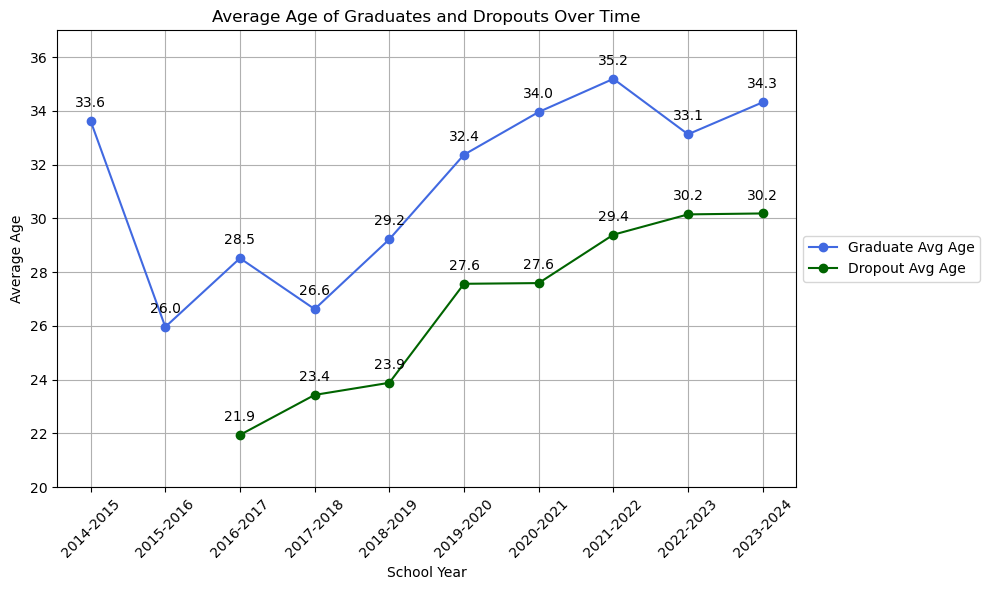

School Year  Total Graduates  Total Dropouts  Average Age (Non-Graduates)  Average Age (Graduates)
  2014-2015               50               0                          NaN                    33.63
  2015-2016              139               0                          NaN                    25.96
  2016-2017              122             661                        21.95                    28.52
  2017-2018              192             871                        23.43                    26.63
  2018-2019              166            1314                        23.88                    29.22
  2019-2020              246            1045                        27.57                    32.37
  2020-2021              227             700                        27.59                    33.96
  2021-2022              291            1613                        29.39                    35.19
  2022-2023              358            1376                        30.15                    33.13
  2023-202

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

# Define school year ranges from 2014 to 2024
school_years = [(datetime(year, 8, 1), datetime(year + 1, 7, 31)) for year in range(2014, 2024)]

# Create an empty list to store results for students without graduation
results_without_graduation = []

# Loop through each school year range
for start_date, end_date in school_years:
    # Filter the DataFrame to include only students without a graduation date within the school year range
    students_in_year = combined_df[(combined_df['Graduate Date'].isnull()) & 
                                    (combined_df['Drop Out Date'] >= start_date) & 
                                    (combined_df['Drop Out Date'] <= end_date)].copy()
    
    # Calculate the age of each student at the time of withdrawal within the school year range
    students_in_year['Age at Withdrawal'] = (students_in_year['Drop Out Date'] - students_in_year['Date of Birth']).dt.days // 365
    
    # Compute the average age of students without a graduation date for the school year
    average_age = students_in_year['Age at Withdrawal'].mean()
    
    # Append the result to the list
    results_without_graduation.append({'School Year': f"{start_date.year}-{end_date.year}", 
                                       'Average Age': average_age})

# Create a DataFrame from the list of results for students without graduation
average_age_per_year_without_graduation = pd.DataFrame(results_without_graduation)


# Create an empty list to store results for graduates
results_graduates = []

# Loop through each school year range
for start_date, end_date in school_years:
    # Filter the DataFrame to include only graduates within the school year range
    graduates_in_year = combined_df[(combined_df['Graduate Date'] >= start_date) & 
                                     (combined_df['Graduate Date'] <= end_date)].copy()
    
    # Calculate the age of each graduate at the time of graduation within the school year range
    graduates_in_year['Age at Graduation'] = (graduates_in_year['Graduate Date'] - graduates_in_year['Date of Birth']).dt.days // 365
    
    # Compute the overall average age for the school year by taking the mean of mean ages per ID
    overall_average_age = graduates_in_year['Age at Graduation'].mean()
    
    # Append the result to the list
    results_graduates.append({'School Year': f"{start_date.year}-{end_date.year}", 'Average Age': overall_average_age})

# Create a DataFrame from the list of results for graduates
average_age_per_year_graduates = pd.DataFrame(results_graduates)

# Merge the DataFrames on 'School Year'
merged_df = average_age_per_year_without_graduation.merge(average_age_per_year_graduates, on='School Year', suffixes=('_no_grad', '_grad'))

# Plot the average age of graduates and students without graduation over time
plt.figure(figsize=(10, 6))
plt.plot(merged_df['School Year'], merged_df['Average Age_grad'], marker='o', color='royalblue', label='Graduate Avg Age')
plt.plot(merged_df['School Year'], merged_df['Average Age_no_grad'], marker='o', color='darkgreen', label='Dropout Avg Age')
plt.xlabel('School Year')
plt.ylabel('Average Age')
plt.title('Average Age of Graduates and Dropouts Over Time')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()

# Annotate each data point with its respective percentage value
for column in merged_df.columns[1:]:
    for i, txt in enumerate(merged_df[column]):
        plt.annotate(f'{txt:.1f}', (merged_df['School Year'][i], txt), textcoords="offset points", xytext=(0,10), ha='center')

# Move the legend to the right side
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# Set y-axis limit to 1700 so upper value is present on the graph
plt.ylim(20, 37)

plt.tight_layout()
plt.show()

# Display the DataFrame w/out index
print(final_metrics.to_string(index=False))

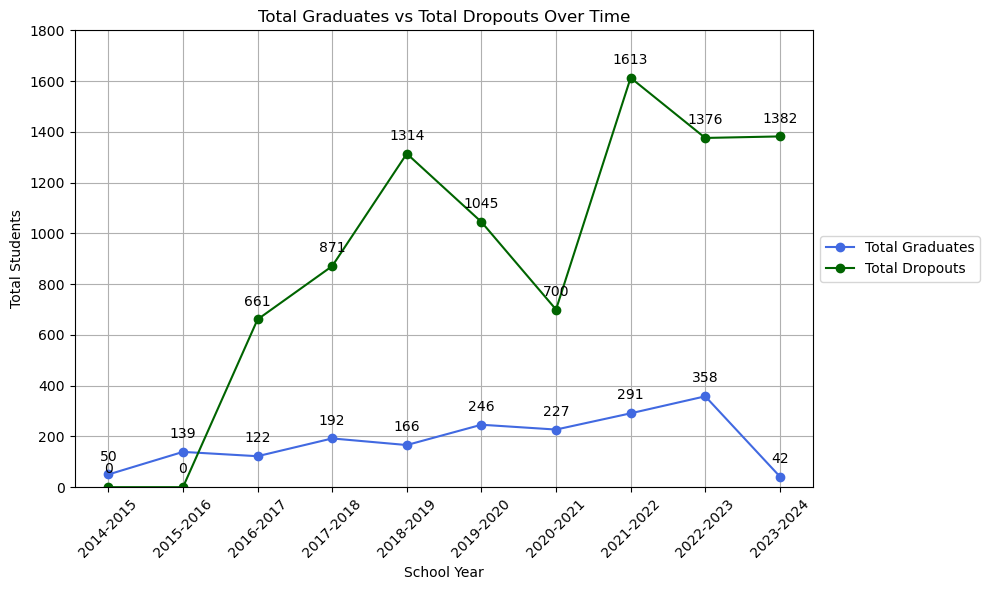

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

# Define school year ranges from August 1 through July 31 for each year
school_years = [(datetime(year, 8, 1), datetime(year + 1, 7, 31)) for year in range(2014, 2024)]

# Create empty dictionaries to store the total number of unique students who graduated and dropped out for each school year
graduates_by_year = {}
dropped_out_by_year = {}

# Filter combined_df to include only rows where the Graduate Status is 'Graduated' or 'Dropped Out'
graduate_students = combined_df[combined_df['Graduated'] == 'Graduate']
dropped_out_students = combined_df[combined_df['Graduated'] == 'Dropped Out']

# Group by school year and count the number of unique students who graduated and dropped out for each school year
for start_date, end_date in school_years:
    year_range = f"{start_date.year}-{end_date.year}"
    
    # Graduates
    graduates_by_year[year_range] = graduate_students[
        (graduate_students['Graduate Date'] >= start_date) &
        (graduate_students['Graduate Date'] <= end_date)
    ]['ID'].nunique()
    
    # Dropped Out
    dropped_out_by_year[year_range] = dropped_out_students[
        (dropped_out_students['Drop Out Date'] >= start_date) &
        (dropped_out_students['Drop Out Date'] <= end_date)
    ]['ID'].nunique()

# Convert the dictionaries into DataFrames for easier plotting
graduates_df = pd.DataFrame(list(graduates_by_year.items()), columns=['School Year', 'Total Graduates'])
dropped_out_df = pd.DataFrame(list(dropped_out_by_year.items()), columns=['School Year', 'Total Dropouts'])

# Merge the DataFrames on 'School Year'
merged_df = pd.merge(graduates_df, dropped_out_df, on='School Year', how='outer')

# Sort by 'School Year'
merged_df.sort_values(by='School Year', inplace=True)

# Plot the data
plt.figure(figsize=(10, 6))
plt.plot(merged_df['School Year'], merged_df['Total Graduates'], marker='o', color='royalblue',  label='Total Graduates')
plt.plot(merged_df['School Year'], merged_df['Total Dropouts'], marker='o', color='darkgreen', label='Total Dropouts')
plt.xlabel('School Year')
plt.ylabel('Total Students')
plt.title('Total Graduates vs Total Dropouts Over Time')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)

# Annotate each data point with its respective percentage value
for column in merged_df.columns[1:]:
    for i, txt in enumerate(merged_df[column]):
        plt.annotate(f'{txt:.0f}', (merged_df['School Year'][i], txt), textcoords="offset points", xytext=(0,10), ha='center')

# Move the legend to the right side
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# Set y-axis limit to 1700 so upper value is present on the graph
plt.ylim(0, 1800)

plt.tight_layout()
plt.show()


In [11]:
# Convert 'Graduated' column to numerical values
# Assuming 'Graduated' column contains 'Graduate' and 'Dropped Out' categories
combined_df['Graduated_Numeric'] = combined_df['Graduated'].map({'Graduate': 1, 'Dropped Out': 0})

# Check the mapping
#print(combined_df[['Graduated', 'Graduated_Numeric']].head())

# Group the DataFrame by the unique student IDs and aggregate the data
grouped_df = combined_df.groupby('ID').agg({
    'Graduated_Numeric': 'mean',  # Assuming 'Graduated_Numeric' is 1 for graduates and 0 for dropouts
    'Age': 'mean',                # Mean age of students within each group
    'Econ Dis': 'mean',           # Mean Economic Disadvantage within each group
    'Total Income': 'mean'        # Mean Total Income within each group
})

# Compute the correlation matrix
correlation_matrix = grouped_df.corr()

# Display the correlation matrix
print(correlation_matrix)

                   Graduated_Numeric       Age  Econ Dis  Total Income
Graduated_Numeric           1.000000  0.162540  0.247553     -0.038916
Age                         0.162540  1.000000  0.066378     -0.103875
Econ Dis                    0.247553  0.066378  1.000000     -0.187870
Total Income               -0.038916 -0.103875 -0.187870      1.000000


In [12]:
# Group the DataFrame by unique student IDs and calculate the total credits earned
total_credits_earned = combined_df.groupby('ID')['Earned Cred'].sum().reset_index()

# Merge the 'Graduated' status with the total credits earned
merged_df = total_credits_earned.merge(combined_df[['ID', 'Graduated_Numeric']], on='ID', how='left')

# Compute the correlation between 'Graduated' status and total credits earned
correlation = merged_df['Graduated_Numeric'].corr(merged_df['Earned Cred'])

# Display the correlation
print("Correlation between 'Graduated' and total credits earned:", correlation)


Correlation between 'Graduated' and total credits earned: 0.1551094133265718


  School Year  Male Percentage (Graduates)  Female Percentage (Graduates)  Male Percentage (Non-Graduates)  Female Percentage (Non-Graduates)
0   2014-2015                    22.000000                      78.000000                              NaN                                NaN
1   2015-2016                    27.338129                      72.661871                              NaN                                NaN
2   2016-2017                    19.672131                      80.327869                        34.644478                          65.204236
3   2017-2018                    23.958333                      76.041667                        35.017222                          64.982778
4   2018-2019                    20.481928                      79.518072                        35.996956                          64.003044
5   2019-2020                    33.739837                      66.260163                        44.019139                          55.980861
6   20

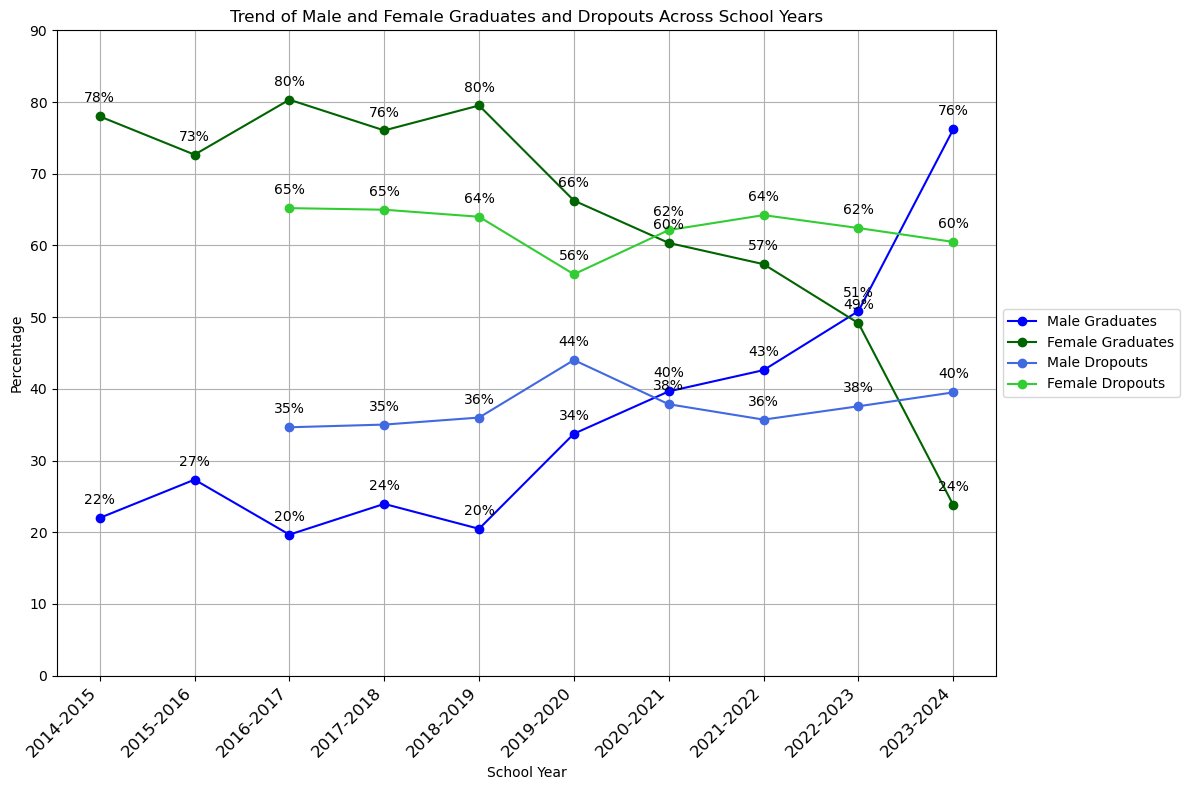

In [13]:
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt

# Define school year ranges from 2014 to 2024
school_years = [(datetime(year, 8, 1), datetime(year + 1, 7, 31)) for year in range(2014, 2024)]

# Create an empty list to store results
results = []

# Loop through each school year range
for start_date, end_date in school_years:
    # Filter the DataFrame to include only graduates within the school year range
    graduates_in_year = combined_df[(combined_df['Graduated'] == 'Graduate') & 
                                     (combined_df['Graduate Date'] >= start_date) & 
                                     (combined_df['Graduate Date'] <= end_date)].copy()
    
    # Filter the DataFrame to include only non-graduates within the school year range
    non_graduates_in_year = combined_df[(combined_df['Graduated'] == 'Dropped Out') & 
                                         (combined_df['Drop Out Date'] >= start_date) & 
                                         (combined_df['Drop Out Date'] <= end_date)].copy()
    
    # Group by 'ID' to get unique graduates and their corresponding sex
    unique_graduates = graduates_in_year.groupby('ID').agg({'Sex': 'first'}).reset_index()
    # Group by 'ID' to get unique non-graduates and their corresponding sex
    unique_non_graduates = non_graduates_in_year.groupby('ID').agg({'Sex': 'first'}).reset_index()
    
    # Calculate the percentage of each sex within the unique graduates
    male_percentage_graduates = (unique_graduates['Sex'] == 'M').mean() * 100
    female_percentage_graduates = (unique_graduates['Sex'] == 'F').mean() * 100
    
    # Calculate the percentage of each sex within the unique non-graduates
    male_percentage_non_graduates = (unique_non_graduates['Sex'] == 'M').mean() * 100
    female_percentage_non_graduates = (unique_non_graduates['Sex'] == 'F').mean() * 100
    
    # Append the result to the list
    results.append({'School Year': f"{start_date.year}-{end_date.year}", 
                    'Male Percentage (Graduates)': male_percentage_graduates, 
                    'Female Percentage (Graduates)': female_percentage_graduates,
                    'Male Percentage (Non-Graduates)': male_percentage_non_graduates,
                    'Female Percentage (Non-Graduates)': female_percentage_non_graduates
                   })
    

# Create a DataFrame from the list of results
percentage_per_year = pd.DataFrame(results)

# Display the percentage of sex by graduates and non-graduates per school year
print(percentage_per_year)

# Set the index to 'School Year' for easier plotting
percentage_per_year.set_index('School Year', inplace=True)

# Increase figure size
plt.figure(figsize=(12, 8))

# Plot the trend across years for male and female graduates
plt.plot(percentage_per_year.index, percentage_per_year['Male Percentage (Graduates)'], marker='o', color='blue', label='Male Graduates')
plt.plot(percentage_per_year.index, percentage_per_year['Female Percentage (Graduates)'], marker='o', color='darkgreen', label='Female Graduates')

# Plot the trend across years for male and female non-graduates
plt.plot(percentage_per_year.index, percentage_per_year['Male Percentage (Non-Graduates)'], marker='o', color='royalblue', label='Male Dropouts')
plt.plot(percentage_per_year.index, percentage_per_year['Female Percentage (Non-Graduates)'], marker='o', color='limegreen', label='Female Dropouts')

plt.xlabel('School Year')
plt.ylabel('Percentage')
plt.title('Trend of Male and Female Graduates and Dropouts Across School Years')
plt.legend()
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.grid(True)  # Add grid lines

# Set custom ticks with increased spacing and larger fontsize
plt.xticks(range(len(percentage_per_year.index)), percentage_per_year.index, fontsize=12)

# Move the legend to the right side
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# Set y-axis limit to 90 so upper value is present on the graph
plt.ylim(0, 90)

# Annotate each data point with its respective value
for column in percentage_per_year.columns:
    for i, txt in enumerate(percentage_per_year[column]):
        plt.annotate(f'{txt:.0f}%', (percentage_per_year.index[i], txt), textcoords="offset points", xytext=(0,10), ha='center')

        
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()


  School Year  Male Percentage (Graduates)  Female Percentage (Graduates)  Male Percentage (Non-Graduates)  Female Percentage (Non-Graduates)
0   2014-2015                    22.000000                      78.000000                              NaN                                NaN
1   2015-2016                    27.338129                      72.661871                              NaN                                NaN
2   2016-2017                    19.672131                      80.327869                        34.644478                          65.204236
3   2017-2018                    23.958333                      76.041667                        35.017222                          64.982778
4   2018-2019                    20.481928                      79.518072                        35.996956                          64.003044
5   2019-2020                    33.739837                      66.260163                        44.019139                          55.980861
6   20

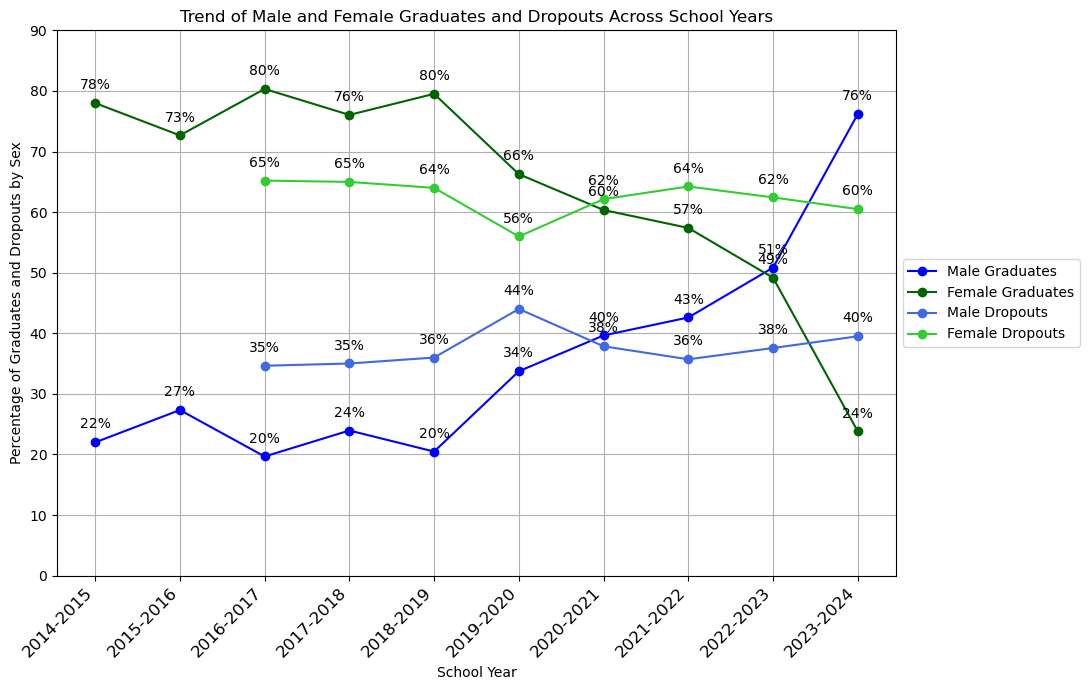

In [14]:
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt

# Define school year ranges from 2014 to 2024
school_years = [(datetime(year, 8, 1), datetime(year + 1, 7, 31)) for year in range(2014, 2024)]

# Create an empty list to store results
results = []

# Loop through each school year range
for start_date, end_date in school_years:
    # Filter the DataFrame to include only graduates within the school year range
    graduates_in_year = combined_df[(combined_df['Graduated'] == 'Graduate') & 
                                     (combined_df['Graduate Date'] >= start_date) & 
                                     (combined_df['Graduate Date'] <= end_date)].copy()
    
    # Filter the DataFrame to include only non-graduates within the school year range
    non_graduates_in_year = combined_df[(combined_df['Graduated'] == 'Dropped Out') & 
                                         (combined_df['Drop Out Date'] >= start_date) & 
                                         (combined_df['Drop Out Date'] <= end_date)].copy()
    
    # Group by 'ID' to get unique graduates and their corresponding sex
    unique_graduates = graduates_in_year.groupby('ID').agg({'Sex': 'first'}).reset_index()
    # Group by 'ID' to get unique non-graduates and their corresponding sex
    unique_non_graduates = non_graduates_in_year.groupby('ID').agg({'Sex': 'first'}).reset_index()
    
    # Calculate the percentage of each sex within the unique graduates
    male_percentage_graduates = (unique_graduates['Sex'] == 'M').mean() * 100
    female_percentage_graduates = (unique_graduates['Sex'] == 'F').mean() * 100
    
    # Calculate the percentage of each sex within the unique non-graduates
    male_percentage_non_graduates = (unique_non_graduates['Sex'] == 'M').mean() * 100
    female_percentage_non_graduates = (unique_non_graduates['Sex'] == 'F').mean() * 100
    
    # Append the result to the list
    results.append({'School Year': f"{start_date.year}-{end_date.year}", 
                    'Male Percentage (Graduates)': male_percentage_graduates, 
                    'Female Percentage (Graduates)': female_percentage_graduates,
                    'Male Percentage (Non-Graduates)': male_percentage_non_graduates,
                    'Female Percentage (Non-Graduates)': female_percentage_non_graduates
                   })
    

# Create a DataFrame from the list of results
percentage_per_year = pd.DataFrame(results)

# Display the percentage of sex by graduates and non-graduates per school year
print(percentage_per_year)

# Set the index to 'School Year' for easier plotting
percentage_per_year.set_index('School Year', inplace=True)

# Increase figure size
plt.figure(figsize=(11, 7))

# Plot the trend across years for male and female graduates
plt.plot(percentage_per_year.index, percentage_per_year['Male Percentage (Graduates)'], marker='o', color='blue', label='Male Graduates')
plt.plot(percentage_per_year.index, percentage_per_year['Female Percentage (Graduates)'], marker='o', color='darkgreen', label='Female Graduates')

# Plot the trend across years for male and female non-graduates
plt.plot(percentage_per_year.index, percentage_per_year['Male Percentage (Non-Graduates)'], marker='o', color='royalblue', label='Male Dropouts')
plt.plot(percentage_per_year.index, percentage_per_year['Female Percentage (Non-Graduates)'], marker='o', color='limegreen', label='Female Dropouts')

plt.xlabel('School Year')
plt.ylabel('Percentage of Graduates and Dropouts by Sex')
plt.title('Trend of Male and Female Graduates and Dropouts Across School Years')
plt.legend()
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.grid(True)  # Add grid lines

# Set custom ticks with increased spacing and larger fontsize
plt.xticks(range(len(percentage_per_year.index)), percentage_per_year.index, fontsize=12)

# Move the legend to the right side
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# Set y-axis limit to 90 so upper value is present on the graph
plt.ylim(0, 90)

# Annotate each data point with its respective value
for column in percentage_per_year.columns:
    for i, txt in enumerate(percentage_per_year[column]):
        plt.annotate(f'{txt:.0f}%', (percentage_per_year.index[i], txt), textcoords="offset points", xytext=(0,10), ha='center')

plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()
